In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
number_date_file = '/mnt/conus3/jason_conus3/sample_numbers_dates_regA_sclA.txt'
number_date_df = pd.read_csv(number_date_file, sep=' ', header=None, names=['kind', 'number', 'date'])
number_date_df.head()

,kind,number,date
0,train,1,2018-04-01_00:00Z
1,train,2,2018-04-01_00:15Z
2,train,3,2018-04-01_00:30Z
3,train,4,2018-04-01_00:45Z
4,train,5,2018-04-01_01:00Z


In [3]:
ian = {
    'name': 'ian',
    'dates': [
        '2022-09-28_15:00Z',
        '2022-09-28_15:15Z',
        '2022-09-28_15:30Z',
        '2022-09-28_15:45Z',
        '2022-09-28_16:00Z',
        '2022-09-28_16:15Z',
        '2022-09-28_16:30Z',
        '2022-09-28_16:45Z',
        '2022-09-28_17:00Z',
        '2022-09-28_17:15Z',
        '2022-09-28_17:30Z',
        '2022-09-28_17:45Z',
        '2022-09-28_18:00Z',
    ],
    'minlat': 24,
    'maxlat': 33,
    'minlon': -88,
    'maxlon': -73
}

derecho = {
    'name': 'derecho',
    'dates': [
        '2022-05-12_20:00Z',
        '2022-05-12_20:15Z',
        '2022-05-12_20:30Z',
        '2022-05-12_20:45Z',
        '2022-05-12_21:00Z',
        '2022-05-12_21:15Z',
        '2022-05-12_21:30Z',
        '2022-05-12_21:45Z',
        '2022-05-12_22:00Z',
        '2022-05-12_22:15Z',
        '2022-05-12_22:30Z',
        '2022-05-12_22:45Z',
        '2022-05-12_23:00Z',
        '2022-05-13_00:00Z',
    ],
    'minlat': 39,
    'maxlat': 47,
    'minlon': -102,
    'maxlon': -94
}

squall = {
    'name': 'squall',
    'dates': [
        '2022-06-13_17:00Z',
        '2022-06-13_17:15Z',
        '2022-06-13_17:30Z',
        '2022-06-13_17:45Z',
        '2022-06-13_18:00Z',
        '2022-06-13_18:15Z',
        '2022-06-13_18:30Z',
        '2022-06-13_18:45Z',
        '2022-06-13_19:00Z',
        '2022-06-13_19:15Z',
        '2022-06-13_19:30Z',
        '2022-06-13_19:45Z',
        '2022-06-13_20:00Z',
        '2022-06-13_20:15Z',
        '2022-06-13_20:30Z',
        '2022-06-13_20:45Z',
        '2022-06-13_21:00Z',
        '2022-06-13_21:15Z',
        '2022-06-13_21:30Z',
        '2022-06-13_21:45Z',
        '2022-06-13_22:00Z',
        '2022-06-13_22:15Z',
        '2022-06-13_22:30Z',
        '2022-06-13_22:45Z',
        '2022-06-13_23:00Z',
        '2022-06-13_23:15Z',
        '2022-06-13_23:30Z',
        '2022-06-13_23:45Z',
        '2022-06-14_00:00Z',
        '2022-06-14_00:15Z',
        '2022-06-14_00:30Z',
        '2022-06-14_00:45Z',
        '2022-06-14_01:00Z',
        '2022-06-14_01:15Z',
        '2022-06-14_01:30Z',
        '2022-06-14_01:45Z',
        '2022-06-14_02:00Z',
        '2022-06-14_02:15Z',
        '2022-06-14_02:30Z',
        '2022-06-14_02:45Z',
        '2022-06-14_03:00Z',
        '2022-06-14_03:15Z',
        '2022-06-14_03:30Z',
        '2022-06-14_03:45Z',
        '2022-06-14_04:00Z',
        '2022-06-14_04:15Z',
        '2022-06-14_04:30Z',
        '2022-06-14_04:45Z',
        '2022-06-14_05:00Z',
        '2022-06-14_05:15Z',
        '2022-06-14_05:30Z',
        '2022-06-14_05:45Z',
        '2022-06-14_06:00Z',
        '2022-06-14_06:15Z',
        '2022-06-14_06:30Z',
        '2022-06-14_06:45Z',
        '2022-06-14_07:00Z',
        '2022-06-14_07:15Z',
        '2022-06-14_07:30Z',
        '2022-06-14_07:45Z',
        '2022-06-14_08:00Z',
        '2022-06-14_08:15Z',
        '2022-06-14_08:30Z',
        '2022-06-14_08:45Z',
        '2022-06-14_09:00Z',
        '2022-06-14_09:15Z',
        '2022-06-14_09:30Z',
        '2022-06-14_09:45Z',
        '2022-06-14_10:00Z',
        '2022-06-14_10:15Z',
        '2022-06-14_10:30Z',
        '2022-06-14_10:45Z',
        '2022-06-14_11:00Z',
        '2022-06-14_11:15Z',
        '2022-06-14_11:30Z',
        '2022-06-14_11:45Z',
    ],
    'minlat': 34,
    'maxlat': 48,
    'minlon': -93,
    'maxlon': -75
}

elsa = {
    'name': 'elsa',
    'dates': [
        '2021-07-07_00:00Z',
        '2021-07-07_06:00Z',
        '2021-07-07_12:00Z',
        '2021-07-07_18:00Z',
        '2021-07-08_00:00Z',
        '2021-07-08_06:00Z',
        '2021-07-08_12:00Z',
        '2021-07-08_18:00Z',
        '2021-07-09_00:00Z',
        '2021-07-09_06:00Z',
        '2021-07-09_12:00Z',
        '2021-07-09_18:00Z',
    ],
    'minlat': 24,
    'maxlat': 44,
    'minlon': -90,
    'maxlon': -65
}

henri = {
    'name': 'henri',
    'dates': [
        '2021-08-22_00:00Z',
        '2021-08-22_06:00Z',
        '2021-08-22_12:00Z',
        '2021-08-22_18:00Z',
        '2021-08-23_00:00Z',
        '2021-08-23_06:00Z',
        '2021-08-23_12:00Z',
        '2021-08-23_18:00Z',
        '2021-08-24_00:00Z',
        '2021-08-24_06:00Z',
    ],
    'minlat': 34,
    'maxlat': 44,
    'minlon': -80,
    'maxlon': -65
}

colin = {
    'name': 'colin',
    'dates': [
        '2022-07-02_06:00Z',
        '2022-07-02_07:00Z',
        '2022-07-02_08:00Z',
        '2022-07-02_09:00Z',
        '2022-07-02_10:00Z',
        '2022-07-02_11:00Z',
        '2022-07-02_12:00Z',
        '2022-07-02_13:00Z',
        '2022-07-02_14:00Z',
        '2022-07-02_15:00Z',
        '2022-07-02_16:00Z',
        '2022-07-02_17:00Z',
        '2022-07-02_18:00Z',
        '2022-07-02_19:00Z',
        '2022-07-02_20:00Z',
        '2022-07-02_21:00Z',
        '2022-07-02_22:00Z',
        '2022-07-02_23:00Z',
        '2022-07-03_00:00Z',
        '2022-07-03_01:00Z',
        '2022-07-03_02:00Z',
        '2022-07-03_03:00Z',
        '2022-07-03_04:00Z',
        '2022-07-03_05:00Z',
        '2022-07-03_06:00Z',
    ],
    'minlat': 28,
    'maxlat': 37,
    'minlon': -85,
    'maxlon': -75
}

config = derecho
ids = number_date_df[number_date_df.date.isin(config['dates'])]['number'].values

In [4]:
ymax = 60.0

def load_y(y_dir, idx):
    return np.clip(np.flip(np.load(os.path.join(y_dir, f'test_predictions_{idx:06d}.npy')), axis=0), 0, 1) * ymax

def load_xt(xt_dir, idx):
    with np.load(os.path.join(xt_dir, f'conus3_regA_sclA_{idx:06d}.npz')) as data:  # C x H x W
        x = np.flip(np.moveaxis(data['xdata'], -1, 0), axis=0)
        t = np.flip(data['ydata'][np.newaxis, ...], axis=0) * ymax
    return x, t

def load_xty(xt_dir, y_dir, idx):
    x, t = load_xt(xt_dir, idx)
    y = load_y(y_dir, idx)
    return x, t, y

In [5]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

In [13]:
def get_colors():

    rgb_colors = []
    # new: CVD accessible
    rgb_colors.append((231, 231, 231))  #0
    rgb_colors.append((111, 239, 255))  #5
    rgb_colors.append(( 95, 207, 239))  #10
    rgb_colors.append(( 79, 175, 223))  #15
    rgb_colors.append(( 47,  95, 191))  #20
    rgb_colors.append(( 31,  63, 175))  #25
    rgb_colors.append(( 15,  31, 159))  #30
    rgb_colors.append((247, 239,  63))  #35
    rgb_colors.append((239, 191,  55))  #40
    rgb_colors.append((231, 143,  47))  #45
    rgb_colors.append((207,  15,  23))  #50
    rgb_colors.append((183,   7,  15))  #55
    rgb_colors.append((159,   0,   8))  #60

    colors = []
    for atup in rgb_colors:
        colors.append('#%02x%02x%02x'%atup)

    cmap = ListedColormap(colors,'radar')
    cmap.set_over(colors[-1])

    # testing this for ref3d plots
    cmap.set_under(colors[0])

    #bounds = [-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
    bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60]

    ticklabels = [str(a) for a in bounds]

    norm = BoundaryNorm(bounds,cmap.N)

    return cmap, norm, bounds, ticklabels

In [58]:
def plot_composite(models, config, xt_dir, results_dir):
    """!convert -delay 30 -loop 0 2022-06-1*.png loop_squall.gif
    """
    basemap = {}
    basemap['projection'] = 'cyl'
    basemap['resolution'] = 'i'
    basemap['fix_aspect'] = False
    basemap['llcrnrlon'] = config['minlon']
    basemap['urcrnrlon'] = config['maxlon']
    basemap['llcrnrlat'] = config['minlat']
    basemap['urcrnrlat'] = config['maxlat']
    basemap = Basemap(**basemap)

    # dimensions
    nlon = 1799
    nlat = 1059
    count = nlat*nlon
    shape = (nlat,nlon)

    with open('/mnt/conus3/jason_conus3/code/hrrr_grid.bin','rb') as f:
        lon = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)
        lat = np.fromfile(f,dtype=np.float64,count=count).reshape(shape)

    #TODO: best guess, follow up with Kyle
    lon = lon[147:nlat-144, 153:nlon-110]
    lat = lat[147:nlat-144, 153:nlon-110]

    x,y = basemap(lon,lat)
    cmap, norm, bounds, ticklabels = get_colors()

    # fig = plt.figure(figsize=(6,len(models)*5), constrained_layout=True)
    fig = plt.figure(figsize=(6 * len(models),5), constrained_layout=True)
    fig.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95)

    ids = number_date_df[number_date_df.date.isin(config['dates'])]['number'].values

    for i, ide in enumerate(tqdm(ids)):
        for j, model in enumerate(tqdm(models, leave=False, total=len(models))):
            title = model.upper()
            if '-' in title:
                title = 'GOES-16 ' + title.split('-')[1]
            time = config['dates'][i]
            title = f"{title} {time.replace('_', ' ')}"

            # plt.subplot(len(models), 1, 1+j)
            plt.subplot(1, len(models), 1+j)
            
            if model.lower() == 'mrms':
                data = load_xt(xt_dir, ide)[1][0]
            else:
                y_dir = os.path.join(results_dir, model)
                data = load_y(y_dir, ide)[0]

            covmask = np.zeros(data.shape)
            nocover = (data == -999)
            covmask[nocover] = 1
            covmask = np.ma.masked_where(covmask==0,covmask)

            pcm = basemap.pcolormesh(x,y,data,cmap=cmap,norm=norm)

            covpcm = basemap.pcolormesh(x,y,covmask,cmap='Greys',vmin=0,vmax=2,alpha=0.5)

            basemap.drawcoastlines()
            basemap.drawcountries()
            basemap.drawstates()
            basemap.drawcounties()

            plt.title(title)

            cb = plt.colorbar(pcm,ticks=bounds,orientation='horizontal',fraction=0.1,pad=0.05)
            cb.ax.set_xticklabels(ticklabels)
            cb.set_label('Composite Reflectivity (dBZ)')

        if i == 0:
            directory = os.path.join(f'../media', f'{config["name"]}')
            os.makedirs(directory, exist_ok=True)

        filename = os.path.join(directory, f'{time}.png')
        fig.savefig(filename, dpi=300)
        plt.clf()

In [57]:
xt_dir = '/mnt/conus3/jason_conus3/test'
results_dir = '/mnt/mlnas01/stock/'
models = ['mrms', 'complete01-vit', 'unet01-unet']

plot_composite(models, config, xt_dir, results_dir)

100%|██████████| 14/14 [02:10<00:00,  9.31s/it]


<Figure size 1800x500 with 0 Axes>

In [ ]:
xt_dir = '/mnt/conus3/jason_conus3/test'
results_dir = '/mnt/mlnas01/stock/'

model = 'complete01-vit'

y_dir = os.path.join(results_dir, model)

ys = []
ts = []
for i in ids:
    _, t, y = load_xty(xt_dir, y_dir, i)
    ys.append(y)
    ts.append(t)

ys = np.concatenate(ys, axis=0)
ts = np.concatenate(ts, axis=0)

In [122]:

# for i in tqdm(range(ys.shape[0])):

#     mref = ts[i]
#     gref = ys[i]
#     time = config['dates'][i]

#     plt.subplot(2,1,1)

#     covmask = np.zeros(mref.shape)
#     nocover = (mref == -999)
#     covmask[nocover] = 1
#     covmask = np.ma.masked_where(covmask==0,covmask)

#     pcm = basemap.pcolormesh(x,y,mref,cmap=cmap,norm=norm)

#     covpcm = basemap.pcolormesh(x,y,covmask,cmap='Greys',vmin=0,vmax=2,alpha=0.5)

#     basemap.drawcoastlines()
#     basemap.drawcountries()
#     basemap.drawstates()
#     basemap.drawcounties()

#     plt.title(f"MRMS {time}")

#     cb = plt.colorbar(pcm,ticks=bounds,orientation='horizontal',fraction=0.1,pad=0.05)
#     cb.ax.set_xticklabels(ticklabels)
#     cb.set_label('Composite Reflectivity (dBZ)')

#     plt.subplot(2,1,2)

#     covmask = np.zeros(gref.shape)
#     nocover = (gref == -999)
#     covmask[nocover] = 1
#     covmask = np.ma.masked_where(covmask==0,covmask)

#     pcm = basemap.pcolormesh(x,y,gref,cmap=cmap,norm=norm)

#     covpcm = basemap.pcolormesh(x,y,covmask,cmap='Greys',vmin=0,vmax=2,alpha=0.5)

#     basemap.drawcoastlines()
#     basemap.drawcountries()
#     basemap.drawstates()
#     basemap.drawcounties()

#     plt.title(f"GOES-16 ViT {time}")

#     cb = plt.colorbar(pcm,ticks=bounds,orientation='horizontal',fraction=0.1,pad=0.05)
#     cb.ax.set_xticklabels(ticklabels)
#     cb.set_label('Composite Reflectivity (dBZ)')

#     if i == 0:
#         directory = os.path.join(f'../media', f'{config["name"]}')
#         os.makedirs(directory, exist_ok=True)

#     filename = os.path.join(directory, f'{time}.png')
#     fig.savefig(filename, dpi=300)
#     plt.clf()

# # !convert -delay 30 -loop 0 2022-06-1*.png loop_squall.gif

100%|██████████| 25/25 [02:15<00:00,  5.44s/it]


<Figure size 600x1000 with 0 Axes>

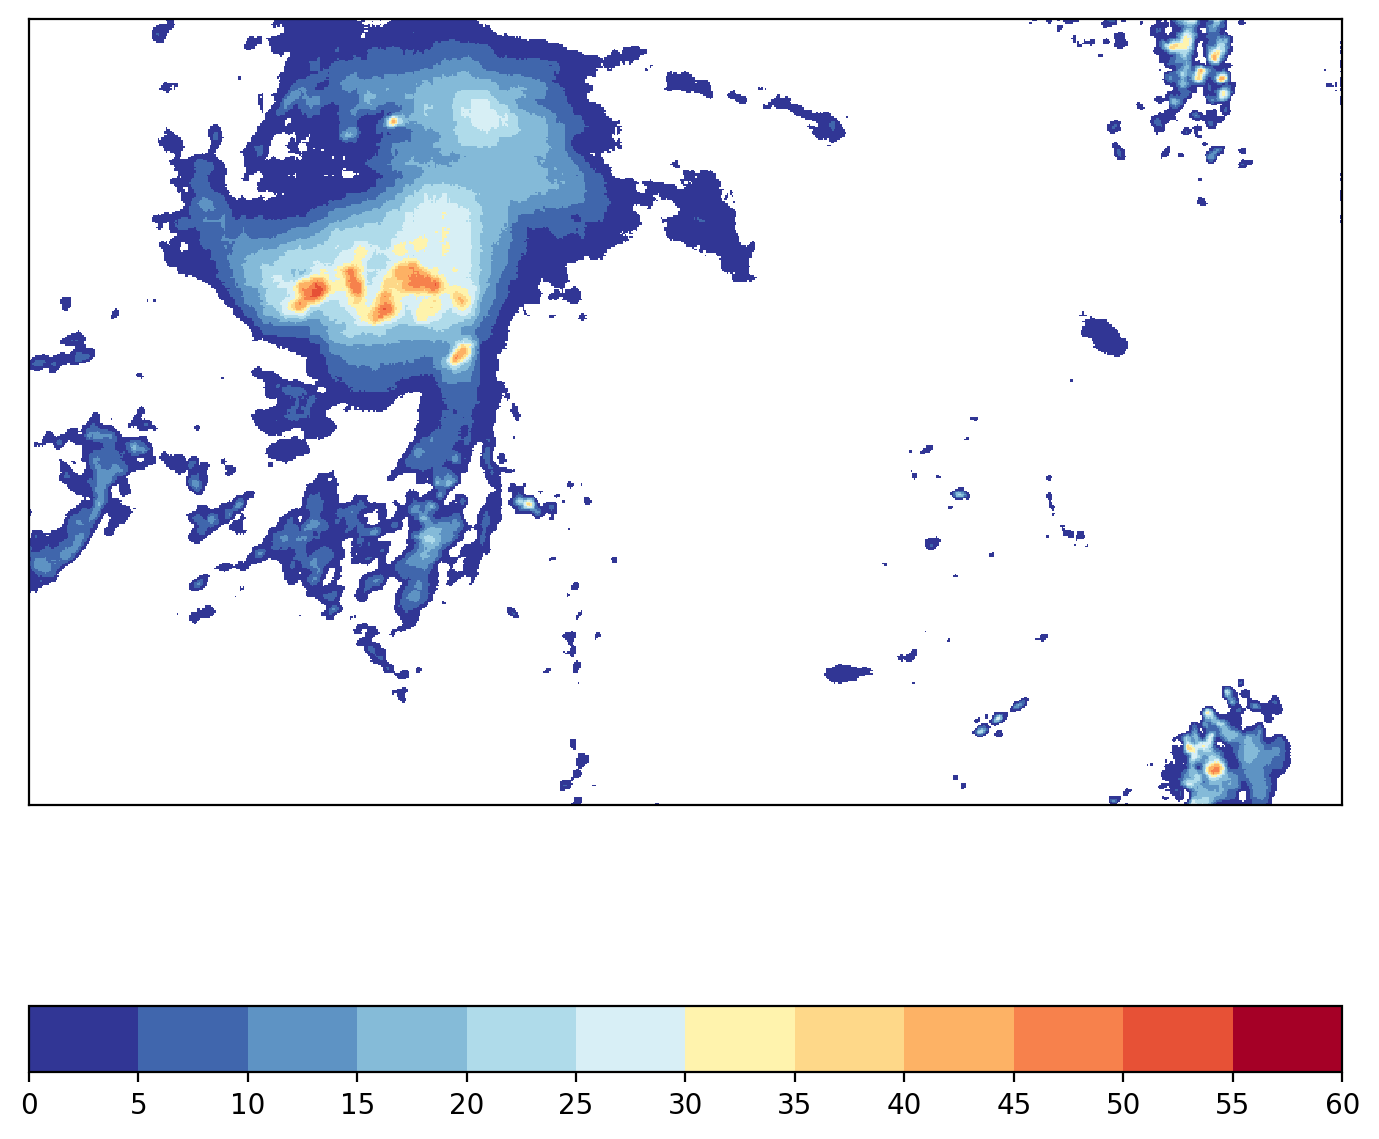

In [211]:
import matplotlib.colors as mcol

Z = np.copy(ys[:500, 700:])
# Z[Z <= 1] = np.nan

bounds = np.linspace(0, 60, 13)

cmap = plt.get_cmap('RdYlBu_r', lut=len(bounds)+1) # RdYlBu_r
# newcolors = cmap(np.linspace(0, 1, 256))
# pink = np.array([.9, .9, .9, 1])
# newcolors[:5, :] = pink
# cmap = mcol.ListedColormap(newcolors)
# cmap.set_bad('white')
norm = mcol.BoundaryNorm(bounds,cmap.N)

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(Z, cmap=cmap, norm=norm, interpolation='none')
cbar = fig.colorbar(im, ticks=bounds, orientation='horizontal')

ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.show()

In [18]:
results_dir = '/mnt/mlnas01/stock/'
dataset = 'test'
output_sample_counts = np.load(os.path.join(results_dir, f'output_sample_counts_{dataset}.npy')) / np.prod((1, 768, 1536))

In [19]:
np.argmax(output_sample_counts)

1226

In [20]:
output_sample_counts.max()

0.20673963758680555

In [13]:
output_sample_counts[np.argmax(output_sample_counts)]

0.20673963758680555

In [12]:
# where number_date_df number == 1226
number_date_df[number_date_df['kind'] == 'test'][number_date_df['number'] == 1226].date.values[0]


'2022-04-13_20:30Z'